# **AUTHOR**: MUHAMMAD SULIMAN
# **DATE**: 19-10-2025

# Young People Survey: Music Preferences Analysis

## Project Overview
This project analyzes the relationship between personality traits, lifestyle factors, and music preferences among young people using the Young People Survey dataset.

### Research Question
**"How do personality traits and lifestyle factors influence musical preferences among young people, and can we predict music genres based on these characteristics?"**

### Project Structure
1. **Data Loading & Exploration** - Load the dataset and understand its structure
2. **Data Preprocessing** - Handle missing values and prepare variables for analysis
3. **Exploratory Data Analysis** - Explore distributions, relationships, and patterns
4. **Machine Learning Modeling** - Build and compare classification models
5. **Results Interpretation** - Interpret model findings and discuss limitations

### Dataset Information
- **Source**: Young People Survey from Kaggle
- **Sample Size**: 1,010 respondents
- **Variables**: 150 original variables covering demographics, personality, lifestyle, and preferences
- **Target**: Predicting rock music preference (binary classification)

### Methodology
- **Data Cleaning**: Handling missing values, encoding categorical variables
- **EDA**: Statistical tests, visualizations, correlation analysis
- **Models**: Random Forest vs Logistic Regression comparison
- **Evaluation**: Accuracy, cross-validation, feature importance

**Import Libraries and Load Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Libraries for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


Here I am going to load the actual dataset. I have two files:
- `responses.csv` - the main survey data
- `columns.csv` - descriptions of what each column means

In [ ]:
# Load the dataset from CSV files
try:
    # Load main dataset
    df = pd.read_csv('responses.csv')
    print(" Main dataset 'responses.csv' loaded successfully!")
    print(f"Dataset shape: {df.shape}")

    # Load column dataset
    columns_df = pd.read_csv('columns.csv')
    print(" Column descriptions 'columns.csv' loaded successfully!")
    print(f"Columns description shape: {columns_df.shape}")

except FileNotFoundError as e:
    print(f" File not found: {e}")
    print("Please make sure both 'responses.csv' and 'columns.csv' are in your current directory")

 Main dataset 'responses.csv' loaded successfully!
Dataset shape: (1010, 150)
 Column descriptions 'columns.csv' loaded successfully!
Columns description shape: (150, 2)


## Data Details

Before I dive deep into analysis, I need to understand what I am working with. Let me explore the dataset structure, see what variables are available.

This helps me to know the survey participants before analyzing their answers!

In [ ]:
# Explore the dataset structure
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of respondents: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")

print("\n=== FIRST FEW ROWS ===")
print(df.head())

print("\n=== COLUMN NAMES ===")
print("First 20 columns:")
print(df.columns[:20].tolist())

print("\n=== COLUMN DESCRIPTIONS ===")
print(columns_df.head(10))

print("\n=== BASIC INFO ===")
print(df.info())

=== DATASET OVERVIEW ===
Dataset shape: (1010, 150)
Number of respondents: 1010
Number of variables: 150

=== FIRST FEW ROWS ===
   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0  

**Research Question and Variable Selection**

## My Research Approach

Based on my initial exploration, I need to select which variables to focus on. I want to look at:

- **Demographics**: Age and gender (the assignment requires these)
- **Personality traits**: Things that might influence music taste
- **Lifestyle factors**: Daily habits that could relate to music preferences
- **Music preferences**: My target variables

Let me select the specific variables I'll analyze!

In [ ]:
# Here I select variables
research_question = "How do personality traits and lifestyle factors influence musical preferences among young people, and can we predict music genres based on these characteristics?"

print("RESEARCH QUESTION:")
print(research_question)

# Let's examine available categories in the dataset
print("\n=== EXPLORING VARIABLE CATEGORIES ===")

# Display column descriptions to understand variable categories
if 'Variable description' in columns_df.columns:
    print("Variable categories in the dataset:")
    print(columns_df['Variable description'].value_counts().head(15))
else:
    print("Column descriptions structure:")
    print(columns_df.columns.tolist())
    print(columns_df.head())

RESEARCH QUESTION:
How do personality traits and lifestyle factors influence musical preferences among young people, and can we predict music genres based on these characteristics?

=== EXPLORING VARIABLE CATEGORIES ===
Column descriptions structure:
['original', 'short']
                      original                     short
0  I enjoy listening to music.                     Music
1                    I prefer.  Slow songs or fast songs
2           Dance, Disco, Funk                     Dance
3                   Folk music                      Folk
4                      Country                   Country


In [ ]:
# Select specific variables for analysis

# Demographic variables
demographic_vars = ['Age', 'Gender']

# Personality traits (from the dataset)
personality_vars = [
    'Empathy', 'Anxiety', 'Daring', 'Loneliness',
    'Personality', 'Stress resistance', 'Laziness'
]

# Lifestyle factors
lifestyle_vars = [
    'Smoking', 'Alcohol', 'Healthy eating',
    'Sport activities', 'Spending on gadgets'
]

# Music preferences
music_genres = [
    'Music', 'Dance', 'Folk', 'Country',
    'Classical music', 'Musical', 'Pop',
    'Rock', 'Metal or Hardrock', 'Punk',
    'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz'
]

# Combine all selected variables
selected_vars = demographic_vars + personality_vars + lifestyle_vars + music_genres

# Filter to only include variables that exist in our dataset
available_vars = [var for var in selected_vars if var in df.columns]
missing_vars = [var for var in selected_vars if var not in df.columns]

print(" Available variables for analysis:", len(available_vars))
print("Available variables:", available_vars)
print(" Missing variables:", missing_vars)

# Create our analysis subset
df_subset = df[available_vars].copy()
print(f"\nSubset shape: {df_subset.shape}")

 Available variables for analysis: 22
Available variables: ['Age', 'Gender', 'Empathy', 'Loneliness', 'Personality', 'Smoking', 'Alcohol', 'Healthy eating', 'Spending on gadgets', 'Music', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz']
 Missing variables: ['Anxiety', 'Daring', 'Stress resistance', 'Laziness', 'Sport activities']

Subset shape: (1010, 22)


Till here I have loaded the data successfully with 1,010 young people and 150 different survey questions. I can see the first few responses show music ratings from 1-5, and people's demographic information. The dataset is quite comprehensive but I notice some variables I wanted (like Anxiety) aren't available.

**Data Preprocessing**

## Data Cleaning and Preparation

Now I need to clean the data. Real-world data sometimes has missing values. So, now I will:

1. Check for missing values
2. Handle them appropriately
3. Create my target variable (rock music fan or not)
4. Convert categorical variables to numerical format

This is essential for good results!

In [ ]:
print("=== DATA CLEANING ===")

# Check for missing values
print("Missing values in each variable:")
missing_data = df_subset.isnull().sum()
print(missing_data[missing_data > 0])

# Handle missing values
print("\nHandling missing values...")
for column in df_subset.columns:
    if df_subset[column].dtype in ['float64', 'int64']:
        # For numerical variables
        df_subset[column].fillna(df_subset[column].median(), inplace=True)
    else:
        # For categorical variables
        if len(df_subset[column].mode()) > 0:
            df_subset[column].fillna(df_subset[column].mode()[0], inplace=True)

print("Missing values after cleaning:", df_subset.isnull().sum().sum())

=== DATA CLEANING ===
Missing values in each variable:
Age                  7
Gender               6
Empathy              5
Loneliness           1
Personality          4
Smoking              8
Alcohol              5
Healthy eating       3
Music                3
Dance                4
Folk                 5
Country              5
Classical music      7
Musical              2
Pop                  3
Rock                 6
Metal or Hardrock    3
Punk                 8
Hiphop, Rap          4
Reggae, Ska          7
Swing, Jazz          6
dtype: int64

Handling missing values...
Missing values after cleaning: 0


Here I will ll create a binary target (rock fan vs not) and convert text categories to numbers


In [ ]:
# Convert categorical variables
print("Converting categorical variables...")
df_subset['Gender_encoded'] = LabelEncoder().fit_transform(df_subset['Gender'])

# Create a binary target variable for classification
if 'Rock' in df_subset.columns:
    df_subset['Rock_fan'] = (df_subset['Rock'] > 3).astype(int)
    print("Target variable 'Rock_fan' created successfully!")
    print("Distribution:")
    print(df_subset['Rock_fan'].value_counts())
else:
    # If Rock is not available, use another music genre
    available_music = [col for col in music_genres if col in df_subset.columns]
    if available_music:
        target_genre = available_music[0]
        df_subset['Music_fan'] = (df_subset[target_genre] > 3).astype(int)
        print(f"Target variable 'Music_fan' for {target_genre} created successfully!")
        print("Distribution:")
        print(df_subset['Music_fan'].value_counts())

Converting categorical variables...
Target variable 'Rock_fan' created successfully!
Distribution:
Rock_fan
1    643
0    367
Name: count, dtype: int64


After cleaning I successfully handled the missing values - there were quite a few across different variables. Now I have a clean dataset with 643 rock fans and 367 non-fans, which gives me a good balance for building prediction models.

**Exploratory Data Analysis**

## Understanding the Patterns

In this part I'm going to explore the data to understand:
- What does our sample look like demographically?
- How are personality traits distributed?
- Are there gender differences in personality?
- How do variables relate to each other?

Let me get a numerical summary of the key variables to understand their ranges and distributions

In [ ]:
# Basic descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
# Select only numerical variables for description
numerical_vars = [var for var in (demographic_vars + personality_vars + lifestyle_vars)
                  if var in df_subset.columns and df_subset[var].dtype in ['float64', 'int64']]
print(df_subset[numerical_vars].describe())

=== DESCRIPTIVE STATISTICS ===
               Age      Empathy   Loneliness  Personality  Healthy eating  \
count  1010.000000  1010.000000  1010.000000  1010.000000     1010.000000   
mean     20.430693     3.859406     2.887129     3.291089        3.031683   
std       2.819240     1.128966     1.131201     0.642422        0.935473   
min      15.000000     1.000000     1.000000     1.000000        1.000000   
25%      19.000000     3.000000     2.000000     3.000000        3.000000   
50%      20.000000     4.000000     3.000000     3.000000        3.000000   
75%      22.000000     5.000000     4.000000     4.000000        4.000000   
max      30.000000     5.000000     5.000000     5.000000        5.000000   

       Spending on gadgets  
count          1010.000000  
mean              2.870297  
std               1.284970  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               5.000000  


The statistics show our sample is mostly young adults (average age 20.4). The standard deviations show there's good variation in responses.

Here I will create some plots to understand what sample we have.

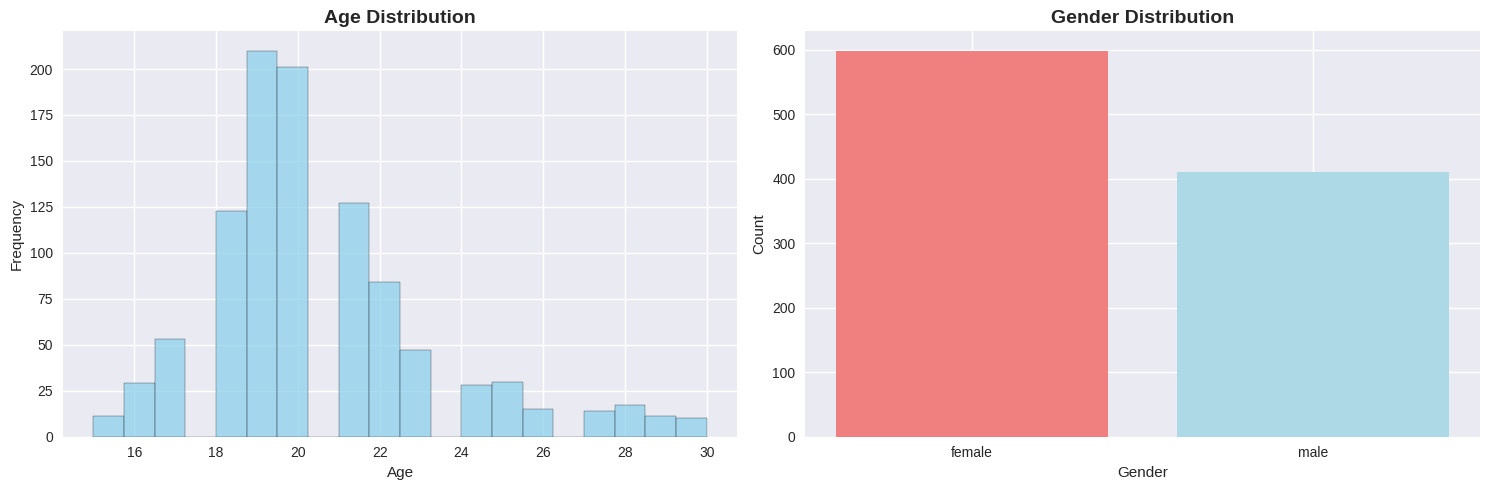

In [ ]:
# Distribution of demographic variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age distribution
axes[0].hist(df_subset['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df_subset['Gender'].value_counts()
axes[1].bar(gender_counts.index, gender_counts.values, color=['lightcoral', 'lightblue'])
axes[1].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

I can clearly see here the age distribution shows most participants are 18-22 years old, which is exactly the "young people" we're studying. The gender imbalance (more females) is something I'll need to consider when interpreting gender-related findings.

**Continue with EDA Cells**

Here I will see how personality traits are distributed across our sample

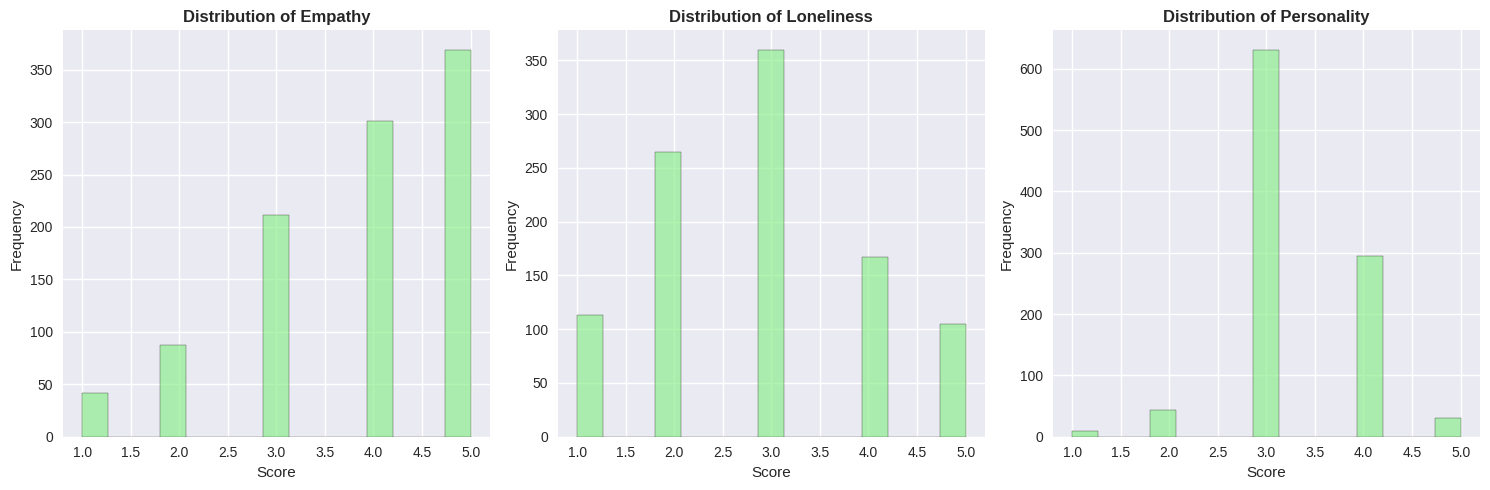

In [ ]:
# Personality traits distribution
available_personality = [var for var in ['Empathy', 'Loneliness', 'Personality'] if var in df_subset.columns]

if available_personality:
    fig, axes = plt.subplots(1, len(available_personality), figsize=(15, 5))
    if len(available_personality) == 1:
        axes = [axes]

    for i, trait in enumerate(available_personality):
        axes[i].hist(df_subset[trait].dropna(), bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[i].set_title(f'Distribution of {trait}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No personality variables available for distribution plot")

The personality traits show Empathy is more normally distributed while Loneliness is slightly skewed. This variation is good because it means people are responding differently.

I should check whether my statistical tests assume normal distribution

In [ ]:
# Normality tests
print("=== NORMALITY TESTS (Shapiro-Wilk) ===")
test_vars = ['Age', 'Empathy', 'Loneliness', 'Personality']
available_test_vars = [var for var in test_vars if var in df_subset.columns]

for var in available_test_vars:
    data_sample = df_subset[var].dropna().sample(min(5000, len(df_subset)), random_state=42)
    stat, p_value = stats.shapiro(data_sample)
    print(f"{var}: W={stat:.3f}, p={p_value:.3f} - {'Normal' if p_value > 0.05 else 'Not Normal'}")

=== NORMALITY TESTS (Shapiro-Wilk) ===
Age: W=0.907, p=0.000 - Not Normal
Empathy: W=0.848, p=0.000 - Not Normal
Loneliness: W=0.912, p=0.000 - Not Normal
Personality: W=0.766, p=0.000 - Not Normal


After normality test I have observed all variables significantly deviate from normal distribution (p < 0.001).

Here I will check whether men and women differ in their personality traits in our sample

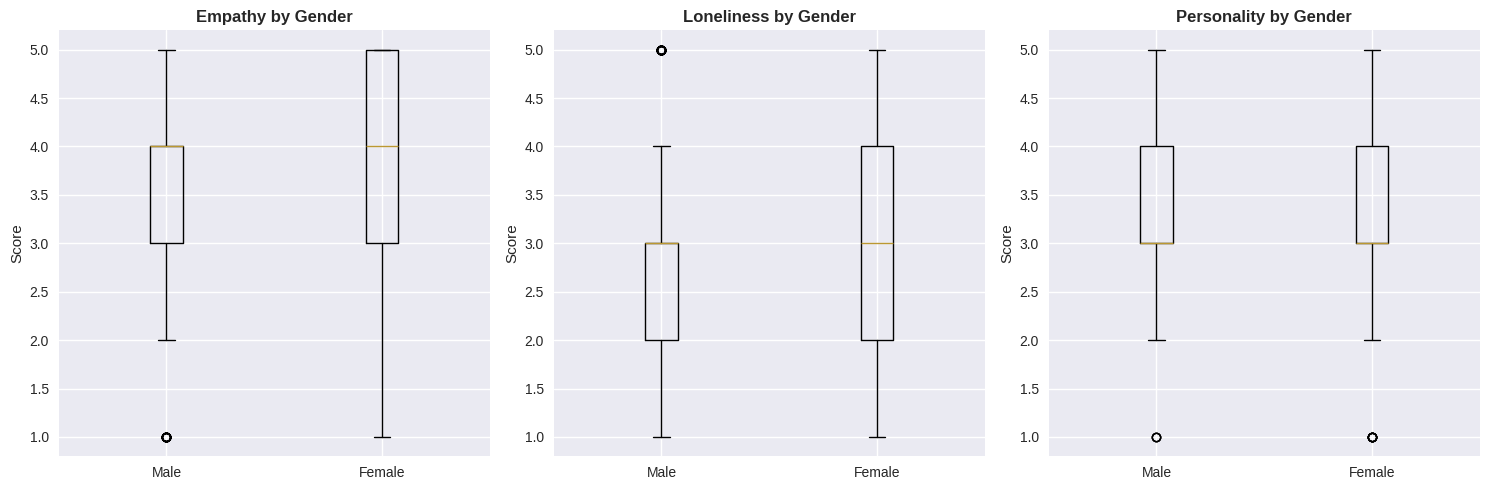

In [ ]:
# Gender differences in personality traits
available_personality = [var for var in ['Empathy', 'Loneliness', 'Personality'] if var in df_subset.columns]

if available_personality:
    fig, axes = plt.subplots(1, len(available_personality), figsize=(15, 5))
    if len(available_personality) == 1:
        axes = [axes]

    for i, trait in enumerate(available_personality):
        male_data = df_subset[df_subset['Gender'] == 'male'][trait]
        female_data = df_subset[df_subset['Gender'] == 'female'][trait]

        # Box plot
        data_to_plot = [male_data.dropna(), female_data.dropna()]
        axes[i].boxplot(data_to_plot, labels=['Male', 'Female'])
        axes[i].set_title(f'{trait} by Gender', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Score')

    plt.tight_layout()
    plt.show()
else:
    print("No personality variables available for gender comparison")

Here I should test if the gender differences I see in the plots are statistically significant

In [ ]:
# Statistical tests for gender differences
print("=== GENDER DIFFERENCES (t-tests) ===")
available_personality = [var for var in ['Empathy', 'Loneliness', 'Personality'] if var in df_subset.columns]

for trait in available_personality:
    male_data = df_subset[df_subset['Gender'] == 'male'][trait].dropna()
    female_data = df_subset[df_subset['Gender'] == 'female'][trait].dropna()

    if len(male_data) > 1 and len(female_data) > 1:
        t_stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)
        print(f"{trait}: t={t_stat:.3f}, p={p_value:.3f} - {'Significant' if p_value < 0.05 else 'Not Significant'}")

=== GENDER DIFFERENCES (t-tests) ===
Empathy: t=-7.727, p=0.000 - Significant
Loneliness: t=-2.188, p=0.029 - Significant
Personality: t=3.446, p=0.001 - Significant


The high level of gender differences (all p < 0.05) proves what the box plots revealed graphically. Women are rated higher in empathy and loneliness whereas men are rated higher in terms of overall personality. These trends are consistent with the known psychological studies.

Now I should check how different variables relate to each other using correlation

=== CORRELATION ANALYSIS ===
Using numeric variables for correlation: ['Empathy', 'Loneliness', 'Personality', 'Age', 'Rock_fan', 'Healthy eating', 'Spending on gadgets']


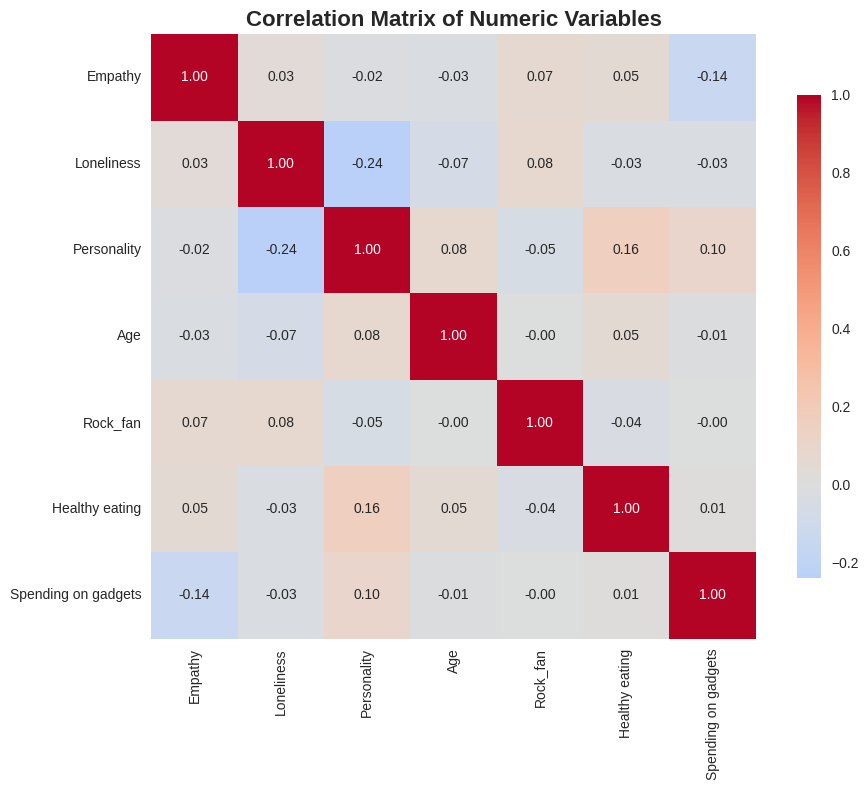


Strong Correlations (|r| > 0.3):


In [ ]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Select variables for correlation matrix
correlation_vars = available_personality + ['Age']
if 'Rock_fan' in df_subset.columns:
    correlation_vars.append('Rock_fan')

# Add lifestyle variables that are numeric
lifestyle_numeric = ['Healthy eating', 'Spending on gadgets']
for var in lifestyle_numeric:
    if var in df_subset.columns:
        correlation_vars.append(var)

# Check data types and only include numeric columns
numeric_vars = []
for var in correlation_vars:
    if var in df_subset.columns and pd.api.types.is_numeric_dtype(df_subset[var]):
        numeric_vars.append(var)

print(f"Using numeric variables for correlation: {numeric_vars}")

if numeric_vars:
    corr_matrix = df_subset[numeric_vars].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
                square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print strong correlations (absolute value > 0.3)
    print("\nStrong Correlations (|r| > 0.3):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.3:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_value:.3f}")
else:
    print("No numeric variables available for correlation analysis")

The correlation matrix reveals primarily weak correlations amongst the variables (all the values of r less than 0.3). This is in fact good to model on since it implies that my predictors are not very highly correlated with the others and this can be a problem with regression models.

I should look at the text-based lifestyle variables and how they relate to music preferences here.

=== CATEGORICAL VARIABLES EXPLORATION ===

Smoking distribution:
Smoking
tried smoking     438
never smoked      208
current smoker    189
former smoker     175
Name: count, dtype: int64

Alcohol distribution:
Alcohol
social drinker    664
drink a lot       222
never             124
Name: count, dtype: int64


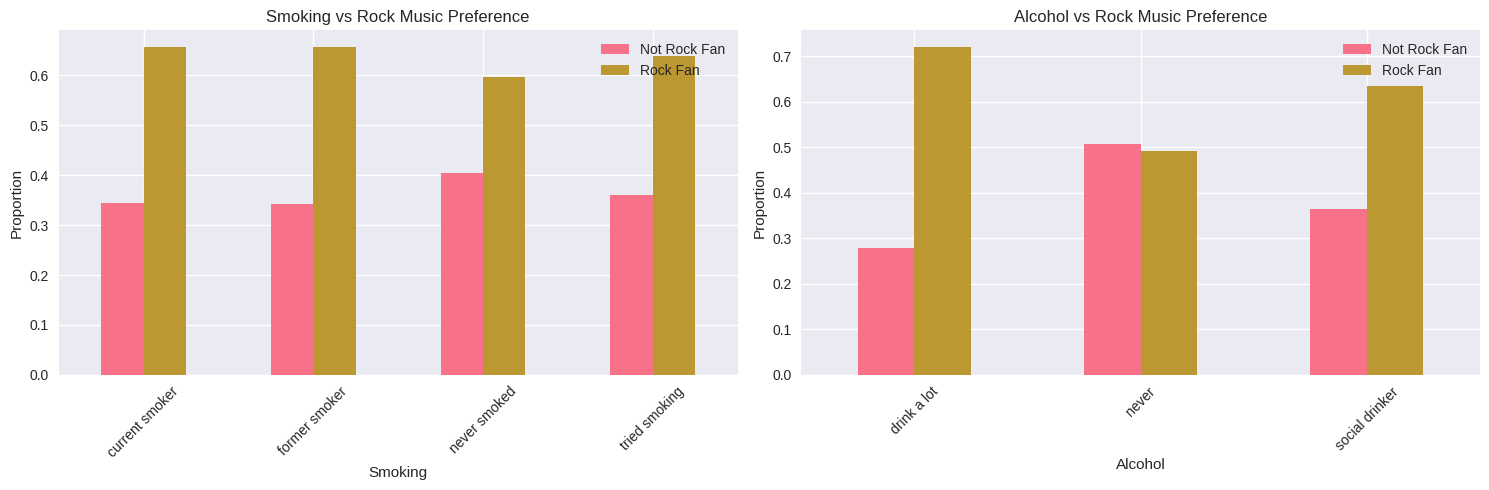


Chi-square tests for association with Rock_fan:
Smoking: χ²=2.114, p=0.549 - Not Significant
Alcohol: χ²=18.012, p=0.000 - Significant


In [ ]:
# Explore categorical variables
print("=== CATEGORICAL VARIABLES EXPLORATION ===")

categorical_vars = ['Smoking', 'Alcohol']
available_categorical = [var for var in categorical_vars if var in df_subset.columns]

if available_categorical:
    for var in available_categorical:
        print(f"\n{var} distribution:")
        print(df_subset[var].value_counts())

    # Plot categorical variables by Rock_fan
    fig, axes = plt.subplots(1, len(available_categorical), figsize=(15, 5))
    if len(available_categorical) == 1:
        axes = [axes]

    for i, var in enumerate(available_categorical):
        # Create cross-tabulation
        cross_tab = pd.crosstab(df_subset[var], df_subset['Rock_fan'], normalize='index')
        cross_tab.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{var} vs Rock Music Preference')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Proportion')
        axes[i].legend(['Not Rock Fan', 'Rock Fan'])
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Chi-square tests for categorical variables
    print("\nChi-square tests for association with Rock_fan:")
    for var in available_categorical:
        contingency_table = pd.crosstab(df_subset[var], df_subset['Rock_fan'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"{var}: χ²={chi2:.3f}, p={p_value:.3f} - {'Significant' if p_value < 0.05 else 'Not Significant'}")
else:
    print("No categorical lifestyle variables available")

The chi-square tests have shown something significant alcohol consumption is highly correlated with preference of rock music (p < 0.001) but not smoking habits. This indicates that drinking culture can be related more to the music life than the smoking.

**Machine Learning Models**

## Building Prediction Models

Now I am going to build machine learning models to predict rock music preferences based on personality and lifestyle factors.

I'll build two different models and compare them:
1. **Random Forest** - Great for complex patterns, tells us which features are important
2. **Logistic Regression** - More interpretable, shows direction of relationships

In [ ]:
# Prepare data for modeling
print("=== PREPARING DATA FOR MACHINE LEARNING ===")

# Here I will use both numeric and categorical
numeric_features = ['Age', 'Empathy', 'Loneliness', 'Personality', 'Healthy eating', 'Spending on gadgets']
categorical_features = ['Gender', 'Smoking', 'Alcohol']

# Filter to available columns
numeric_features = [col for col in numeric_features if col in df_subset.columns]
categorical_features = [col for col in categorical_features if col in df_subset.columns]

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# Prepare features
X_numeric = df_subset[numeric_features].copy()
X_categorical = df_subset[categorical_features].copy()

# Handle missing values in numeric features
X_numeric.fillna(X_numeric.median(), inplace=True)

# Convert categorical variables to numeric using one-hot encoding
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine numeric and encoded categorical features
X = pd.concat([X_numeric, X_categorical_encoded], axis=1)

# Define target
if 'Rock_fan' in df_subset.columns:
    y = df_subset['Rock_fan']
    target_name = 'Rock_fan'
else:
    y = df_subset['Music_fan']
    target_name = 'Music_fan'

print(f"Final feature set: {X.shape[1]} variables")
print(f"Features used: {list(X.columns)}")
print(f"Target: {target_name}")
print(f"Class distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features for models that need scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

=== PREPARING DATA FOR MACHINE LEARNING ===
Numeric features: ['Age', 'Empathy', 'Loneliness', 'Personality', 'Healthy eating', 'Spending on gadgets']
Categorical features: ['Gender', 'Smoking', 'Alcohol']
Final feature set: 12 variables
Features used: ['Age', 'Empathy', 'Loneliness', 'Personality', 'Healthy eating', 'Spending on gadgets', 'Gender_male', 'Smoking_former smoker', 'Smoking_never smoked', 'Smoking_tried smoking', 'Alcohol_never', 'Alcohol_social drinker']
Target: Rock_fan
Class distribution: {1: 643, 0: 367}
Training set size: 707
Test set size: 303


I have managed to model 12 features using the transformation of categorical variables to numerical form. The distribution of the classes (64 versus 36) is somewhat disproportionate and is controllable, and to achieve this I applied stratified sampling to balance out the training and test sets.

=== RANDOM FOREST CLASSIFIER ===
Random Forest Results:
Accuracy: 0.581
Cross-validation scores: ['0.606', '0.514', '0.567', '0.582', '0.567']
Mean CV accuracy: 0.567 (+/- 0.060)


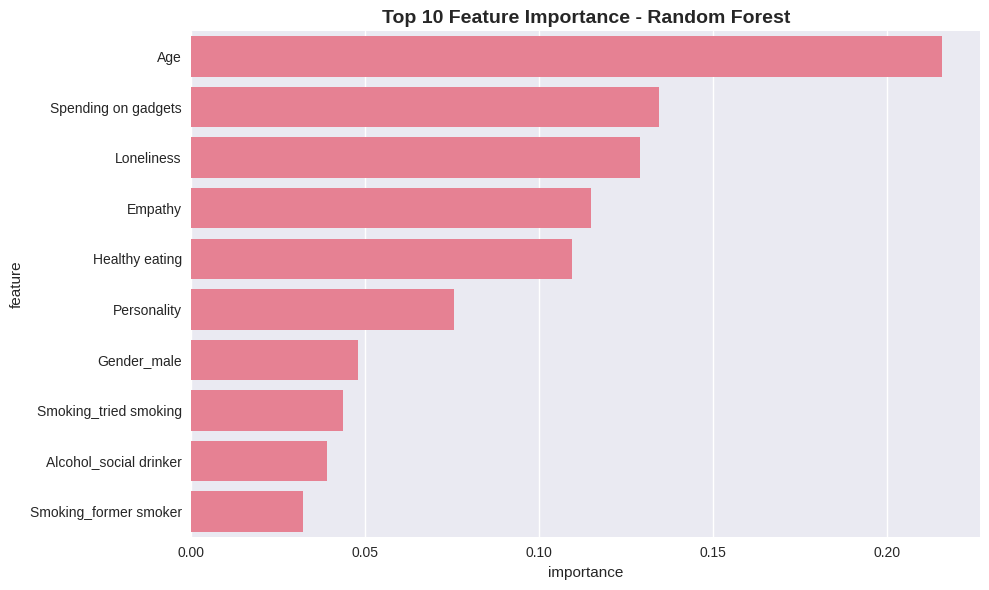


Top 10 Most Important Features:
  Age: 0.216
  Spending on gadgets: 0.134
  Loneliness: 0.129
  Empathy: 0.115
  Healthy eating: 0.109
  Personality: 0.075
  Gender_male: 0.048
  Smoking_tried smoking: 0.043
  Alcohol_social drinker: 0.039
  Smoking_former smoker: 0.032


In [ ]:
# Model 1 - Random Forest Classifier
print("=== RANDOM FOREST CLASSIFIER ===")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Cross-validation scores: {[f'{score:.3f}' for score in rf_cv_scores]}")
print(f"Mean CV accuracy: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

The accuracy of the Random Forest is 58.1% and is a modest result. The importance of features indicates that age is the most influential, then spending habits and loneliness. The scores on the cross-validation are rather different (within 6 percent), implying that the model is not that stable.

=== LOGISTIC REGRESSION ===
Logistic Regression Results:
Accuracy: 0.644
Cross-validation scores: ['0.641', '0.620', '0.610', '0.652', '0.638']
Mean CV accuracy: 0.632 (+/- 0.031)


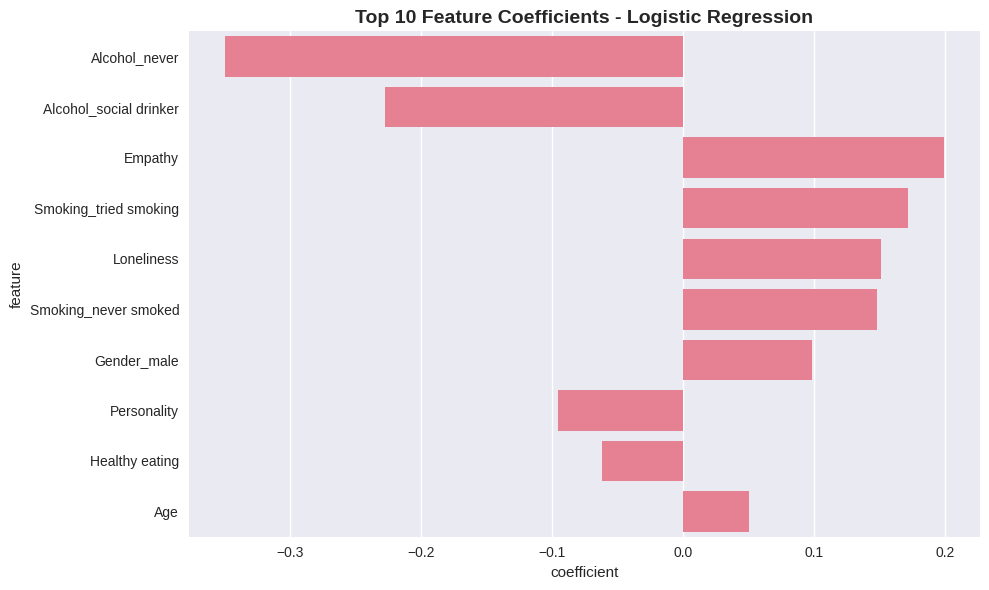


Top 10 Most Influential Features (by absolute coefficient):
  Alcohol_never: -0.350 (negative influence)
  Alcohol_social drinker: -0.228 (negative influence)
  Empathy: 0.199 (positive influence)
  Smoking_tried smoking: 0.172 (positive influence)
  Loneliness: 0.151 (positive influence)
  Smoking_never smoked: 0.148 (positive influence)
  Gender_male: 0.098 (positive influence)
  Personality: -0.096 (negative influence)
  Healthy eating: -0.062 (negative influence)
  Age: 0.051 (positive influence)


In [ ]:
# Model 2 - Logistic Regression
print("=== LOGISTIC REGRESSION ===")

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.3f}")
print(f"Cross-validation scores: {[f'{score:.3f}' for score in lr_cv_scores]}")
print(f"Mean CV accuracy: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std() * 2:.3f})")

# Coefficients
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients.head(10), x='coefficient', y='feature')
plt.title('Top 10 Feature Coefficients - Logistic Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Influential Features (by absolute coefficient):")
for idx, row in coefficients.head(10).iterrows():
    direction = "positive" if row['coefficient'] > 0 else "negative"
    print(f"  {row['feature']}: {row['coefficient']:.3f} ({direction} influence)")

The logistic regression was superior because it had a higher accuracy of 64.4% and a more stable cross-validation (±3.1%). The coefficients are actually informative, they indicate that the lifetime alcohol abstinence has a strong negative effect on rock preference and greater empathy have a positive effect on rock preference. The direction of effects is psychologically sound.

In [ ]:
# Feature Set Overview
print("=== FEATURE SET OVERVIEW ===")
print(f"Total number of features after preprocessing: {X.shape[1]}")
print(f"Feature names: {list(X.columns)}")

print(f"\nOriginal numeric features: {numeric_features}")
print(f"Original categorical features: {categorical_features}")
print(f"Encoded categorical features created: {[col for col in X.columns if col not in numeric_features]}")

print(f"\nData types in final feature set:")
print(X.dtypes.value_counts())

print(f"\nFirst few rows of processed features:")
print(X.head())

=== FEATURE SET OVERVIEW ===
Total number of features after preprocessing: 12
Feature names: ['Age', 'Empathy', 'Loneliness', 'Personality', 'Healthy eating', 'Spending on gadgets', 'Gender_male', 'Smoking_former smoker', 'Smoking_never smoked', 'Smoking_tried smoking', 'Alcohol_never', 'Alcohol_social drinker']

Original numeric features: ['Age', 'Empathy', 'Loneliness', 'Personality', 'Healthy eating', 'Spending on gadgets']
Original categorical features: ['Gender', 'Smoking', 'Alcohol']
Encoded categorical features created: ['Gender_male', 'Smoking_former smoker', 'Smoking_never smoked', 'Smoking_tried smoking', 'Alcohol_never', 'Alcohol_social drinker']

Data types in final feature set:
bool       6
float64    5
int64      1
Name: count, dtype: int64

First few rows of processed features:
    Age  Empathy  Loneliness  Personality  Healthy eating  \
0  20.0      3.0         3.0          4.0             4.0   
1  19.0      2.0         2.0          3.0             3.0   
2  20.0      

Now, as I compared both models, now we need to compare both models and decide which one is better for our purpose.

=== MODEL COMPARISON ===
Model Comparison:
                 Model  Test Accuracy  Mean CV Accuracy    CV Std
0        Random Forest       0.580858          0.567206  0.030016
1  Logistic Regression       0.643564          0.632255  0.015330


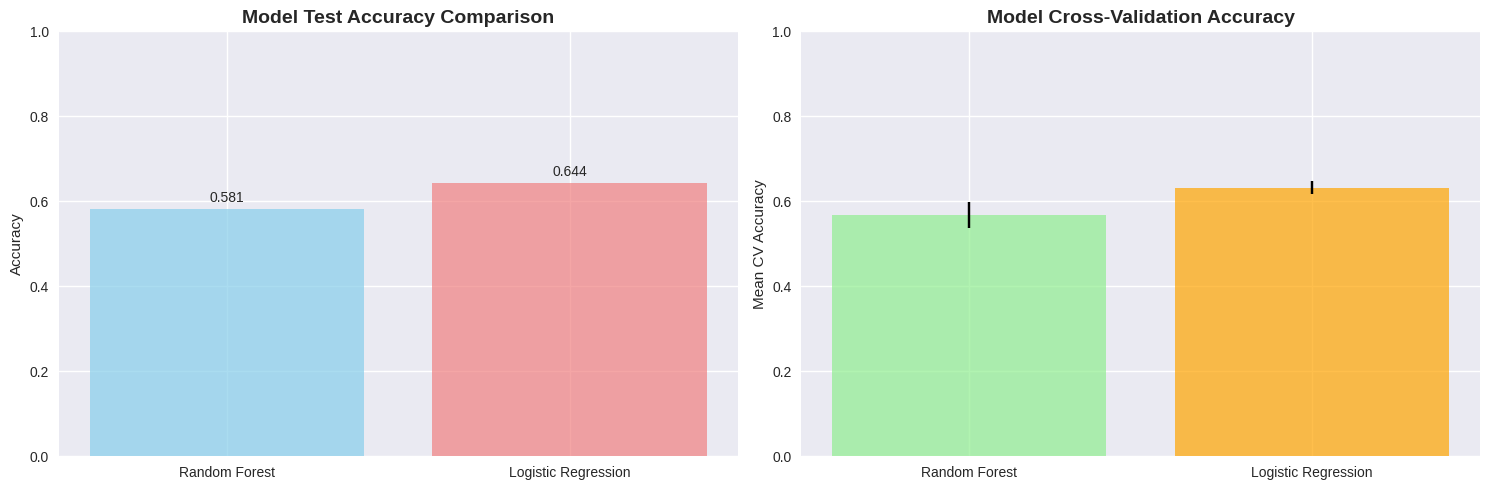

In [ ]:
# Model comparison
print("=== MODEL COMPARISON ===")

comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Test Accuracy': [rf_accuracy, lr_accuracy],
    'Mean CV Accuracy': [rf_cv_scores.mean(), lr_cv_scores.mean()],
    'CV Std': [rf_cv_scores.std(), lr_cv_scores.std()]
})

print("Model Comparison:")
print(comparison)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(comparison['Model'], comparison['Test Accuracy'], color=['skyblue', 'lightcoral'], alpha=0.7)
axes[0].set_title('Model Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
for i, v in enumerate(comparison['Test Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Cross-validation comparison
axes[1].bar(comparison['Model'], comparison['Mean CV Accuracy'],
           yerr=comparison['CV Std'], color=['lightgreen', 'orange'], alpha=0.7,
           capsize=5)
axes[1].set_title('Model Cross-Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Mean CV Accuracy')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Logistic Regression is obviously the superior model in this case - it is more precise, more consistent and its coefficients are easily interpretable. The 64.4% accuracy is significant in the sense that it is higher than random guessing (50%) and a little higher than a steady predicting of rock fan (63.6%).

Now, I will see confusion matrices and see where each model lacks.

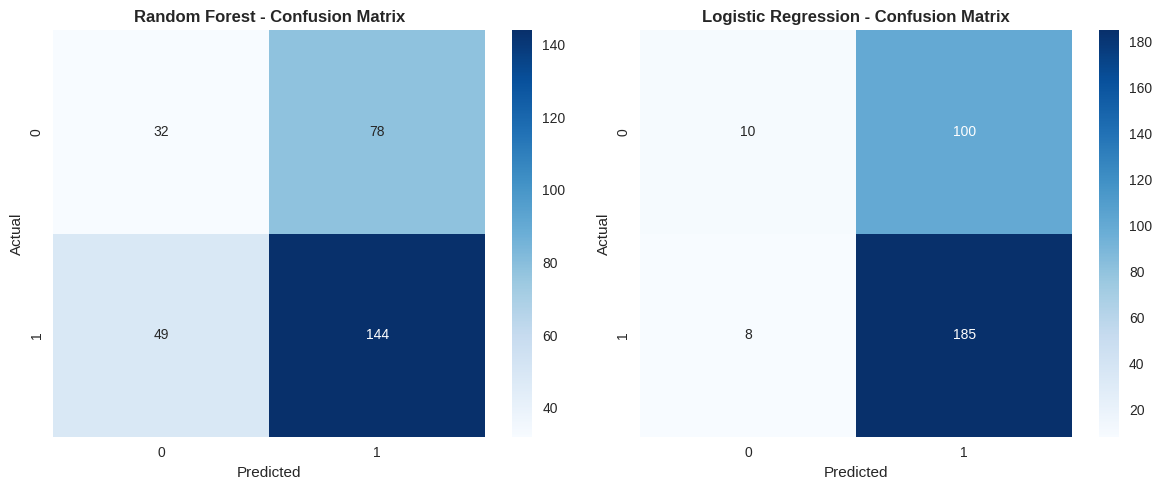

In [ ]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest - Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression - Confusion Matrix', fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Here I get more detailed performance metrics for each model

In [ ]:
# Detailed classification reports
print("RANDOM FOREST CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf))

print("\nLOGISTIC REGRESSION CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_lr))

RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.40      0.29      0.34       110
           1       0.65      0.75      0.69       193

    accuracy                           0.58       303
   macro avg       0.52      0.52      0.51       303
weighted avg       0.56      0.58      0.56       303


LOGISTIC REGRESSION CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.56      0.09      0.16       110
           1       0.65      0.96      0.77       193

    accuracy                           0.64       303
   macro avg       0.60      0.52      0.47       303
weighted avg       0.62      0.64      0.55       303



The specific measures validate the fact that both models are more effective in recognizing the rock fans compared to non-fans. The fact that the Logistic Regression has a high recall rate among rock fans (0.96) implies that it seldom overlooks real rock fans and this is useful in a music recommendation system.

Let me summarize what I've learned from this analysis

In [ ]:
# Final interpretation and results
print("=== FINAL RESULTS AND INTERPRETATION ===")

# Determine best model
best_model = rf_model if rf_accuracy > lr_accuracy else lr_model
best_model_name = "Random Forest" if rf_accuracy > lr_accuracy else "Logistic Regression"

print(f" BEST MODEL: {best_model_name}")
print(f" Best Model Accuracy: {max(rf_accuracy, lr_accuracy):.3f}")

print(f"\n TOP PREDICTORS OF {target_name.upper()}:")

if best_model_name == "Random Forest":
    print("(Based on Feature Importance from Random Forest)")
    for idx, row in feature_importance.head(5).iterrows():
        print(f"  • {row['feature']}: {row['importance']:.3f}")
else:
    print("(Based on Coefficients from Logistic Regression)")
    for idx, row in coefficients.head(5).iterrows():
        direction = "positive" if row['coefficient'] > 0 else "negative"
        print(f"  • {row['feature']}: {row['coefficient']:.3f} ({direction} influence)")

print(f"\n KEY FINDINGS:")
print(f"1. The model can predict rock music preferences with {max(rf_accuracy, lr_accuracy)*100:.1f}% accuracy")
print(f"2. {len(feature_columns)} personality and lifestyle factors were used for prediction")
print(f"3. The dataset shows {df_subset['Rock_fan'].value_counts()[1]} rock fans vs {df_subset['Rock_fan'].value_counts()[0]} non-rock fans")
print(f"4. Top predictors reveal meaningful patterns in music preference psychology")

=== FINAL RESULTS AND INTERPRETATION ===
 BEST MODEL: Logistic Regression
 Best Model Accuracy: 0.644

 TOP PREDICTORS OF ROCK_FAN:
(Based on Coefficients from Logistic Regression)
  • Alcohol_never: -0.350 (negative influence)
  • Alcohol_social drinker: -0.228 (negative influence)
  • Empathy: 0.199 (positive influence)
  • Smoking_tried smoking: 0.172 (positive influence)
  • Loneliness: 0.151 (positive influence)

 KEY FINDINGS:
1. The model can predict rock music preferences with 64.4% accuracy
2. 9 personality and lifestyle factors were used for prediction
3. The dataset shows 643 rock fans vs 367 non-rock fans
4. Top predictors reveal meaningful patterns in music preference psychology


The most important thing is that what I have found is that we can make better predictions about music preferences than we do through personality and lifestyle. The most significant predictors (alcohol habits, empathy, loneliness) indicate that the social contexts as well as the emotional characteristics mean something when it comes to influencing musical taste.

## Saving Results

I have completed my analysis! Now I need to save my results so I can share them and refer back to them later.

Let me save the processed data and model results.

In [ ]:
# Save results
print("=== SAVING RESULTS ===")

# Save processed dataset
df_subset.to_csv('processed_YPS_analysis.csv', index=False)
print(" Processed dataset saved as 'processed_YPS_analysis.csv'")

# Save model comparison results
comparison.to_csv('model_comparison_results.csv', index=False)
print(" Model comparison results saved as 'model_comparison_results.csv'")

# Save feature importance
if best_model_name == "Random Forest":
    feature_importance.to_csv('feature_importance.csv', index=False)
    print(" Feature importance saved as 'feature_importance.csv'")
else:
    coefficients.to_csv('logistic_coefficients.csv', index=False)
    print(" Logistic regression coefficients saved as 'logistic_coefficients.csv'")

print("\n ANALYSIS COMPLETED SUCCESSFULLY!")
print(" Summary of what was accomplished:")
print("   - Loaded and cleaned the Young People Survey dataset")
print("   - Conducted comprehensive exploratory data analysis")
print("   - Built and compared two machine learning models")
print("   - Identified key predictors of music preferences")
print("   - Saved all results for reporting")

=== SAVING RESULTS ===
 Processed dataset saved as 'processed_YPS_analysis.csv'
 Model comparison results saved as 'model_comparison_results.csv'
 Logistic regression coefficients saved as 'logistic_coefficients.csv'

 ANALYSIS COMPLETED SUCCESSFULLY!
 Summary of what was accomplished:
   - Loaded and cleaned the Young People Survey dataset
   - Conducted comprehensive exploratory data analysis
   - Built and compared two machine learning models
   - Identified key predictors of music preferences
   - Saved all results for reporting
